In [1]:
%run 'pymol_and_pdb_functions.py'
start_pymol()

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


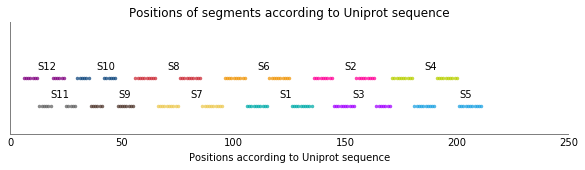

1886 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


In [2]:
import itertools

%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks17'
image_counter = Counter()

In [6]:
his3_24mer_file = os.path.join(structure_predictions_folder, 'his3_24mer_assembly', 
                                                  'his3_swiss_aligned_to_4lom_assembly.pdb')

structural_data = pd.read_hdf(files_dump_folder + 'structural_data_for_monomer.hdf', 'data')

In [7]:
all_assayed_positions = [7, 8, 9, 11, 13, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54, 55, 56, 59, 60, 62, 66, 67, 73, 76, 77, 78, 79, 80, 81, 82, 85, 86, 87, 92, 93, 96, 97, 98, 99, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 117, 119, 120, 121, 122, 131, 135, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 154, 157, 160, 161, 163, 164, 165, 168, 169, 170, 171, 172, 173, 175, 177, 178, 180, 181, 183, 189, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211]
sign_positions = [7, 8, 9, 11, 13, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 38, 41, 56, 60, 62, 76, 77, 78, 79, 80, 81, 82, 85, 96, 97, 98, 99, 102, 104, 105, 106, 108, 110, 111, 112, 114, 115, 117, 119, 120, 121, 122, 131, 135, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 151, 152, 154, 157, 160, 161, 163, 164, 165, 168, 169, 170, 172, 175, 177, 181, 189, 202, 203, 206, 207, 208, 209]
no_sign_positions = [19, 21, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 45, 47, 48, 49, 50, 52, 53, 54, 55, 59, 66, 67, 73, 86, 87, 92, 93, 171, 173, 178, 180, 183, 195, 196, 198, 200, 201, 204, 205, 210, 211]
unsampled_positions = set(structural_data['position'].values)
unsampled_positions.difference_update(set(all_assayed_positions))

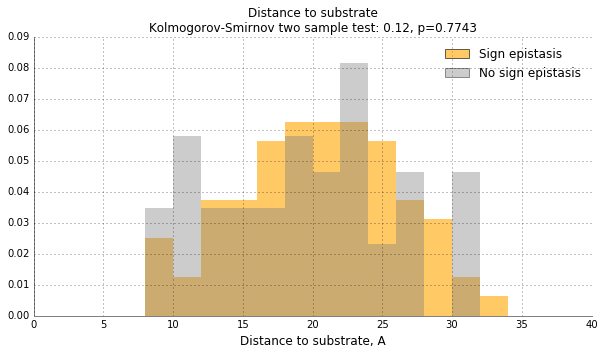

In [8]:
column_to_use = 'substrate'

title = 'Distance to substrate'
plot_better()
# sign = structural_data[structural_data.lucas_sign_epistasis]
# no_sign = structural_data[~structural_data.lucas_sign_epistasis]
sign = structural_data[structural_data.position.isin(sign_positions)]
no_sign = structural_data[structural_data.position.isin(no_sign_positions)]

plt.hist(sign[column_to_use], alpha=0.6, range=(0,40), normed=True,
         edgecolor='none', bins=20, color='orange', label='Sign epistasis')
plt.hist(no_sign[column_to_use], alpha=0.4, 
         range=(0,40), edgecolor='none', bins=20, color='gray', label='No sign epistasis', normed=True)
KS_test = stats.ks_2samp(sign[column_to_use], no_sign[column_to_use])
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.4f' %(KS_test[0], KS_test[1]))
plt.xlabel('Distance to substrate, A', fontsize=12)
plt.legend(loc='upper right', frameon=False)

In [43]:
print len(sign)
print len(no_sign)

90
115


In [57]:
def color_positions(positions, representation='spheres', color_hex='#f37736', co_selection=None):
    for index, position in enumerate(positions):
        colorName = "color_" + str(position)
        selName = "temp_selection"
        cmd.set_color(colorName, hex_to_rgb(color_hex))
        if co_selection:
            cmd.select(selName, 'resi %s' %position + ' & %s' %co_selection)
        else:
            cmd.select(selName, 'resi %s' %position)
        cmd.show(representation, '%s & %s' %(selName, co_selection))
        cmd.color(colorName, '%s & %s' %(selName, co_selection))

        
cmd.reinitialize()
open_or_fetch(his3_24mer_file)
white_and_beautiful(representation='ribbon')

additional_chains = ['P', 'R', 'W']
s9 = positions[positions.segment == 'S9']['positions_Uniprot_P06633'].values[0]

cmd.select('substrate', 'resn IYP', quiet=0)
cmd.select('mn', 'resn MN')
cmd.select('mn304', 'resi 304')

cmd.select('trimer', 'chain A or chain G or chain J')
cmd.select('chaina', 'chain A')
cmd.select('chaing', 'chain G')
cmd.select('chainj', 'chain J')
cmd.select('sign_epistasis', 'resi %s' %'+'.join([str(i) for i in positions_under_sign_epistasis]))

colorName = "colorA"
cmd.set_color(colorName, hex_to_rgb('#c0c5ce'))
cmd.color('colorA', 'chaina')

colorName = "colorG"
cmd.set_color(colorName, hex_to_rgb('#a7adba'))
cmd.color('colorG', 'chaing')

colorName = "colorJ"
cmd.set_color(colorName, hex_to_rgb('#65737e'))
cmd.color('colorJ', 'chainj')

cmd.color('magenta', 'mn')
cmd.color('green', 'substrate')
color_positions(unsampled_positions, representation='spheres', co_selection='chain J', color_hex='#ff3503')
color_positions(unsampled_positions, representation='spheres', co_selection='chain A', color_hex='#ff3503')
color_positions(unsampled_positions, representation='spheres', co_selection='chain G', color_hex='#ff3503')
# color_positions(s9, representation='spheres', co_selection='chain G', color_hex='#dd458c')


cmd.hide('everything', 'all')
# cmd.show('lines', 'trimer')
cmd.show('spheres', 'trimer and not sign_epistasis and not mn and not substrate')
cmd.show('spheres', 'trimer and sign_epistasis and not mn and not substrate')


cmd.show('spheres', 'trimer and substrate')
cmd.show('spheres', 'trimer and mn')
for chain in additional_chains:
    cmd.show('spheres', 'substrate and chain %s' %chain)
    cmd.show('spheres', 'mn and chain %s and not resi 304 and not resi 302' %chain)

cmd.set_view(bottom_central_view)

save_session('/Users/karen/Downloads/test22223.pse')

 Applying pse_export_version=1.720 compatibility


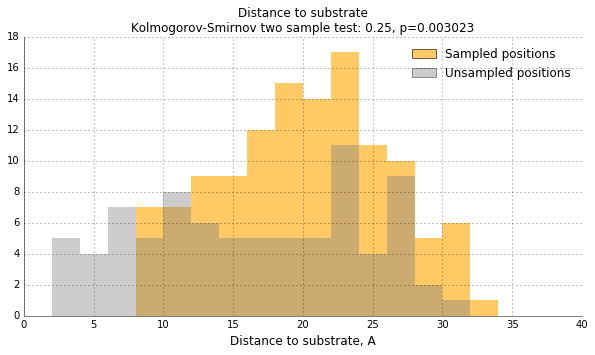

In [9]:
column_to_use = 'substrate'

title = 'Distance to substrate'
plot_better()
sampled = structural_data[structural_data.position.isin(all_assayed_positions)]
unsampled = structural_data[structural_data.position.isin(unsampled_positions)]

h = plt.hist(sampled[column_to_use], alpha=0.6, range=(0,40),
         edgecolor='none', bins=20, color='orange', label='Sampled positions')
plt.hist(unsampled[column_to_use], alpha=0.4, 
         range=(0,40), edgecolor='none', bins=20, color='gray', label='Unsampled positions')
KS_test = stats.ks_2samp(sampled[column_to_use], unsampled[column_to_use])
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.6f' %(KS_test[0], KS_test[1]))
plt.xlabel('Distance to substrate, A', fontsize=12)
plt.legend(loc='upper right', frameon=False)

In [75]:
helices = structural_data[structural_data['secondary_structure'] == 'helix']
sheets = structural_data[structural_data['secondary_structure'] == 'sheet']
disordered = structural_data[structural_data['secondary_structure'] == 'disordered']

In [77]:
printlist([c for c in structural_data.columns if 'res_' not in c and 'ep_' not in c])

Mn_302
Mn_303
Mn_304
Mn_substrate_bound
substrate
position
secondary_structure
interface
lucas_sign_epistasis
lucas_reciprocal_sign_epistasis
segment
Scer_aa
alignment_entropy
alignment_gap_fraction
conservation_score
amino_acid
pKa of ionizing side chaina
Average residue mass (daltons)
Monoisotopic mass (daltons)
Occurrence in proteins, %
Average volume of buried residues, A3
Van der Waals volume, A3
Accessible surface area, A2
Fraction of buried among this aa
Fraction of buried among all buried
Polarity average ranking
Polarity ranking (Radzicka and Wolfenden 1988)
aa1
aa3
ddg_score1
ddG



In [ ]:
ep_columns = [c for c in structural_data.columns if 'ep_mean']
plot_better()
helices.

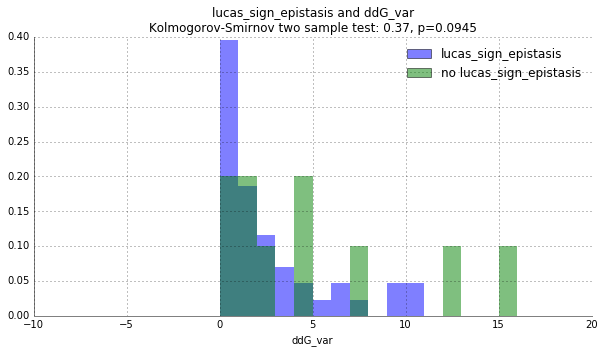

In [31]:
column_to_filter = 'lucas_sign_epistasis'
column_to_use = 'ddG_var'
title = '%s and %s' %(column_to_filter, column_to_use)
plot_better()
plt.hist(structural_data[structural_data[column_to_filter]][column_to_use].dropna(), normed=True, 
         range=(-10,20), bins=30, edgecolor='none', alpha=0.5, label='%s' %column_to_filter)
plt.hist(structural_data[~structural_data[column_to_filter]][column_to_use].dropna(), normed=True, 
         range=(-10,20), bins=30, edgecolor='none', alpha=0.5, label='no %s' %column_to_filter)
plt.xlabel(column_to_use)
KS_test = stats.ks_2samp(structural_data[structural_data[column_to_filter]][column_to_use].dropna(), 
                         structural_data[~structural_data[column_to_filter]][column_to_use].dropna())
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.4f' %(KS_test[0], KS_test[1]))
plt.legend(loc='upper right', frameon=False)

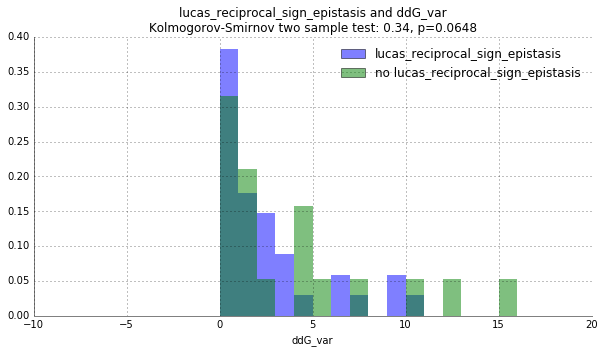

In [32]:
column_to_filter = 'lucas_reciprocal_sign_epistasis'
column_to_use = 'ddG_var'
title = '%s and %s' %(column_to_filter, column_to_use)
plot_better()
plt.hist(structural_data[structural_data[column_to_filter]][column_to_use].dropna(), normed=True, 
         range=(-10,20), bins=30, edgecolor='none', alpha=0.5, label='%s' %column_to_filter)
plt.hist(structural_data[~structural_data[column_to_filter]][column_to_use].dropna(), normed=True, 
         range=(-10,20), bins=30, edgecolor='none', alpha=0.5, label='no %s' %column_to_filter)
plt.xlabel(column_to_use)
KS_test = stats.ks_2samp(structural_data[structural_data[column_to_filter]][column_to_use].dropna(), 
                         structural_data[~structural_data[column_to_filter]][column_to_use].dropna())
plt.title(title + '\n' + 'Kolmogorov-Smirnov two sample test: %.2f, p=%.4f' %(KS_test[0], KS_test[1]))
plt.legend(loc='upper right', frameon=False)